# Dynamical systems

A (discrete time) dynamical system describes the evolution of the state of a system and
the observations that can be obtained from the state. The general form is

\begin{eqnarray}
x_0 & \sim & \pi(x_0) \\
x_t & = & f(x_{t-1}, \epsilon_t) \\
y_t & = & g(x_{t}, \nu_t) 
\end{eqnarray}

Here, $f$ and $g$ are transition and observation functions. The variables
$\epsilon_t$ and $\nu_t$ are assumed to be unknown random noise components with a known distribution. The initial state, $x_0$, can be either known exactly or at least and initial state distribution density $\pi$ is known.  The model describes the relation between observations $y_t$ and states $x_t$. 

## Frequency modulated sinusoidal signal

\begin{eqnarray}
\epsilon_t & \sim & \mathcal{N}(0, P) \\
x_{1,t} & = & \mu + a x_{1,t-1} + \epsilon_t \\
x_{2,t} & = & x_{2,t-1} + x_{1,t-1} \\
\nu_t & \sim & \mathcal{N}(0, R) \\
y_t & = & \cos(2\pi x_{2,t}) + \nu_t
\end{eqnarray}

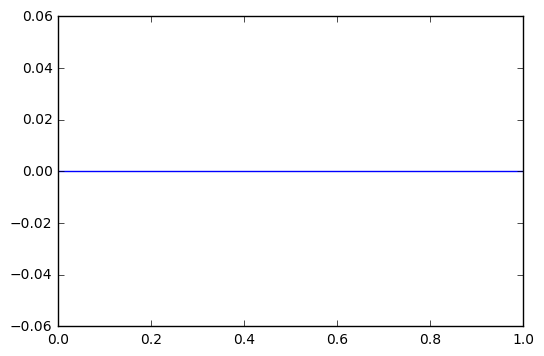

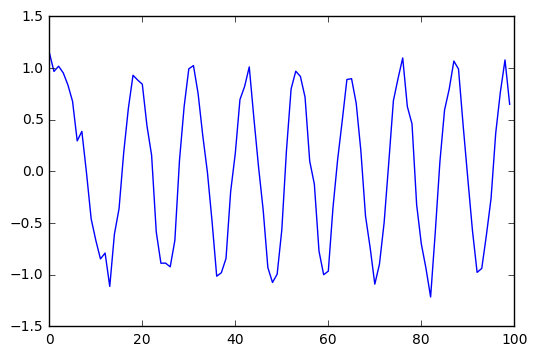

In [496]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt

N = 100
T = 100
a = 0.9
xm = 0.9
sP = np.sqrt(0.001)
sR = np.sqrt(0.01)

x1 = np.zeros(N)
x2 = np.zeros(N)
y = np.zeros(N)

for i in range(N):
    if i==0:
        x1[0] = xm
        x2[0] = 0
    else:
        x1[i] = xm + a*x1[i-1] + np.random.normal(0, sP)
        x2[i] = x2[i-1] + x1[i-1]

    y[i] = np.cos(2*np.pi*x2[i]/T) + np.random.normal(0, sR)
    

plt.figure()
plt.plot(x)
plt.figure()
plt.plot(y)

plt.show()

## Stochastic Kinetic Model

Stochastic Kinetic Model is a general modelling technique to describe the interactions of a set of objects such as molecules, individuals or items. This class of models are particularly useful in modeling queuing systems, production plants, chemical, ecological, biological systems or biological cell cycles at a sufficiently detailed level. It is a good example of a a dynamical model that displays quite interesting and complex behaviour.

The model is best motivated first with a specific example, known as the Lotka-Volterra predator-prey model:

### A Predator Prey Model (Lotka-Volterra)

Consider a population of two species, named as smiley 😊 and zombie 👹. Our dynamical model will describe the evolution of the number of individuals in this entire population. We define $3$ different event types:

#### Event 1: Reproduction

The smiley, denoted by $X_1$, reproduces by division so one smiley becomes two smileys after a reproduction event. 

<h1><center>
😊 $\rightarrow$ 🙂  😊
</center></h1>

In mathematical notation, we denote this event as
\begin{eqnarray}
X_1 & \xrightarrow{k_1} 2 X_1 
\end{eqnarray}

Here, $k_1$ denotes the rate constant, the rate at which a _single_ single smiley is reproducing according to the exponential distribution. When there are $x_1$ smileys, each reproducing with rate $k_1$, the rate at which a reproduction event occurs is simply 
\begin{eqnarray}
h_1(x, k_1) & = & k_1 x_1 
\end{eqnarray}
The rate $h_1$ is the rate of a reproduction event, increasing proportionally to the number of smileys.

#### Event 2: Consumption

The predatory species, the zombies, denoted as $X_2$, transform the smileys into zombies. So one zombie 'consumes' one smiley to create a new zombie.

<h1><center>
 😥 👹 $\rightarrow$ 👹 👹
</center></h1>

The consumption event is denoted as 
\begin{eqnarray}
X_1 + X_2 & \xrightarrow{k_2} 2 X_2 
\end{eqnarray}

Here, $k_2$ denotes the rate constant, the rate at which a zombie and a smiley meet, and the zombie transforms the smiley into a new zombie. When there are $x_1$ smileys and $x_2$ zombies, there are in total $x_1 x_2$ possible meeting events, With each meeting event occurring at rate $k_2$, the rate at which a consumption event occurs is simply 
\begin{eqnarray}
h_2(x, k_2) & = & k_2 x_1 x_2 
\end{eqnarray}
The rate $h_2$ is the rate of a consumption event. There are more consumptions if there are more zombies or smileys.

#### Event 3: Death
Finally, in this story, unlike Hollywood blockbusters, the zombies are mortal and they decease after a certain random time. 

<h1><center>
 👹 $\rightarrow  $ ☠️
</center></h1>

This is denoted as $X_2$ disappearing from the scene.
\begin{eqnarray}
X_2 & \xrightarrow{k_3} \emptyset  
\end{eqnarray}
A zombie death event occurs, by a similar argument as reproduction, at rate 
\begin{eqnarray}
h_3(x, k_3) & = & k_3 x_2 
\end{eqnarray}

#### Model
All equations can be written 

\begin{eqnarray}
X_1 & \xrightarrow{k_1} 2 X_1 & \hspace{3cm}\text{Reproduction}\\
X_1 + X_2 & \xrightarrow{k_2} 2 X_2 & \hspace{3cm}\text{Consumption} \\
X_2 & \xrightarrow{k_3} \emptyset & \hspace{3cm} \text{Death} 
\end{eqnarray}

More compactly, in matrix form we can write:

\begin{eqnarray}
\left(
\begin{array}{cc}
1 & 0 \\
1 & 1 \\
0 & 1 
\end{array}
\right) 
\left(
\begin{array}{cc}
X_1 \\
X_2
\end{array}
\right) \rightarrow
\left(
\begin{array}{cc}
2 & 0 \\
0 & 2 \\
0 & 0 
\end{array}
\right) 
\left(
\begin{array}{cc}
X_1 \\
X_2
\end{array}
\right)
\end{eqnarray}

The rate constants $k_1, k_2$ and $k_3$ denote the rate at which a _single_ event is occurring according to the exponential distribution. 

All objects of type $X_1$ trigger the next event 
\begin{eqnarray}
h_1(x, k_1) & = & k_1 x_1 \\
h_2(x, k_2) & = & k_2 x_1 x_2 \\
h_3(x, k_2) & = & k_3 x_2 
\end{eqnarray}


The dynamical model is conditioned on the type of the next event, denoted by $r(j)$

\begin{eqnarray}
Z(j) & = & \sum_i h_i(x(j-1), k_i) \\
\pi_i(j) & = & \frac{h_i(x(j-1), k_i) }{Z(j)} \\
r(j) & \sim & \mathcal{C}(r; \pi(j)) \\
\Delta(j) & \sim & \mathcal{E}(1/Z(j)) \\
t(j) & = & t(j-1) + \Delta(j) \\
x(j) & = & x(j-1) + S(r(j))  
\end{eqnarray}




/Users/cemgil/anaconda/envs/py27/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


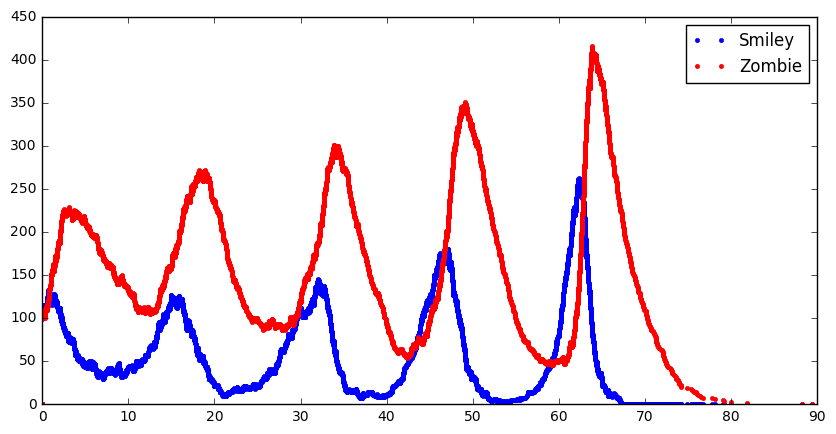

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt

A = np.array([[1,0],[1,1],[0,1]])
B = np.array([[2,0],[0,2],[0,0]])
S = B-A

N = S.shape[1]
M = S.shape[0]

STEPS = 50000

k = np.array([0.8,0.005, 0.3])

X = np.zeros((N,STEPS))
x = np.array([100,100])
T = np.zeros(STEPS)
t = 0


for i in range(STEPS-1):
    rho = k*np.array([x[0], x[0]*x[1], x[1]])
    srho = np.sum(rho)
    
    if srho == 0:
        break
        
    idx = np.random.choice(M, p=rho/srho)
    dt = np.random.exponential(scale=1./srho)

    x = x + S[idx,:]
    t = t + dt
    
    X[:, i+1] = x
    T[i+1] = t
    
plt.figure(figsize=(10,5))
plt.plot(T,X[0,:], '.b')
plt.plot(T,X[1,:], '.r')
plt.legend([u'Smiley',u'Zombie'])
plt.show()

## State Space Representation

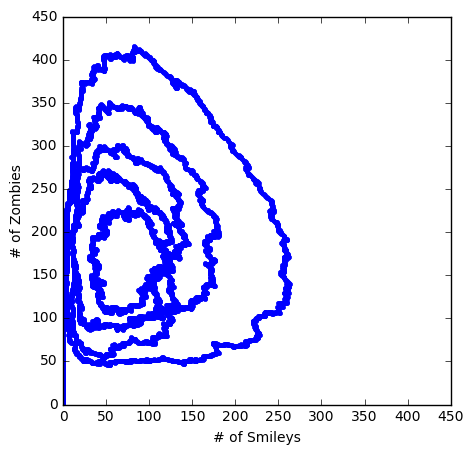

In [2]:
plt.figure(figsize=(10,5))
plt.plot(X[0,:],X[1,:], '.')
plt.xlabel('# of Smileys')
plt.ylabel('# of Zombies')
plt.axis('square')
plt.show()

In this model, the state space can be visualized as a 2-D lattice of nonnegative integers, where each point $(x_1, x_2)$ denotes the number of smileys versus the zombies. 
The model simulates a Markov chain on a directed graph where possible transitions are shown as edges where the edge color shade is proportional to the transition probability (darker means higher probability). 

The edges are directed, the arrow tips are not shown. There are three types of edges, each corresponding to one event type:

* $\rightarrow$ Birth
* $\nwarrow$ Consumption
* $\downarrow$ Death 

 


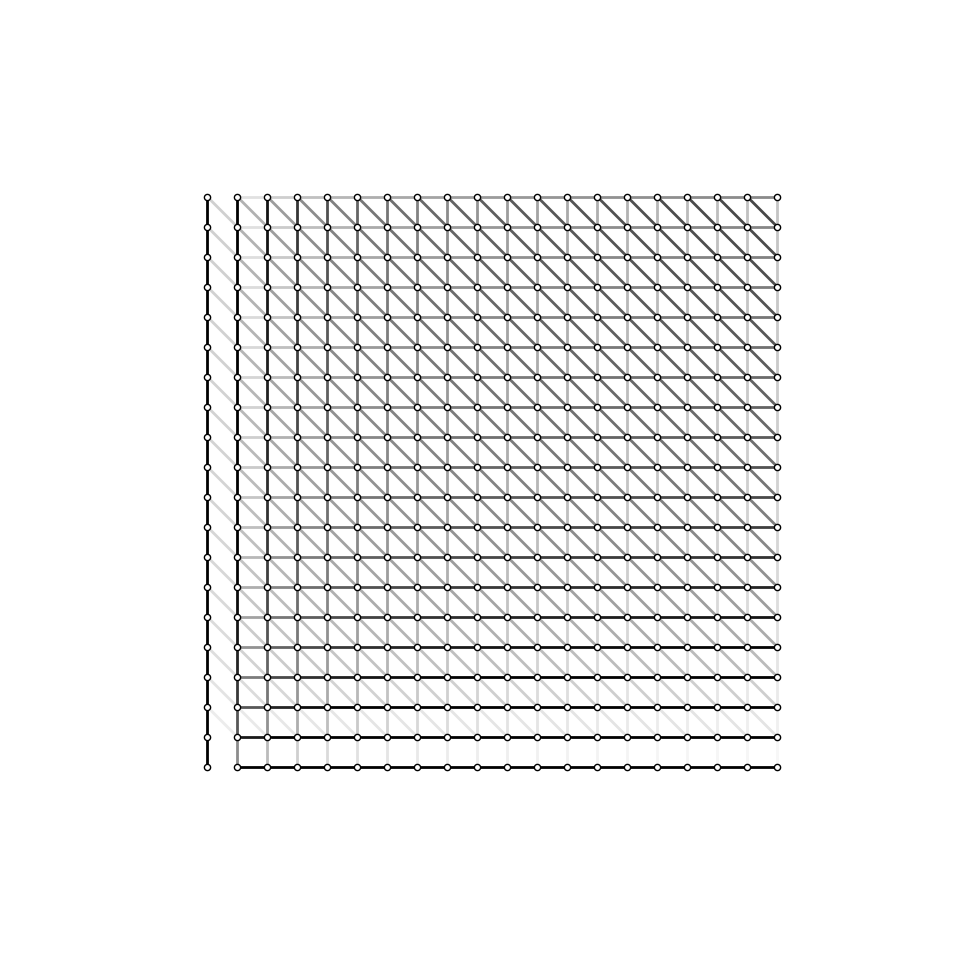

In [4]:
%matplotlib inline
import networkx as nx
import numpy as np
import matplotlib.pylab as plt
from itertools import product

# Maximum number of smileys or zombies
N = 20

#A = np.array([[1,0],[1,1],[0,1]])
#B = np.array([[2,0],[0,2],[0,0]])
#S = B-A
k = np.array([0.6,0.05, 0.3])

G = nx.DiGraph()
pos = [u for u in product(range(N),range(N))]
idx = [u[0]*N+u[1] for u in pos]

G.add_nodes_from(idx)
edge_colors = []
edges = []
for y,x in product(range(N),range(N)):
    source = (x,y)
    rho = k*np.array([source[0], source[0]*source[1], source[1]])
    srho = np.sum(rho)
    if srho==0:
        srho = 1.
        
    if x<N-1: # Birth
        target = (x+1,y)
        edges.append((source[0]*N+source[1], target[0]*N+target[1]))
        edge_colors.append(rho[0]/srho)

    if y<N-1 and x>0: # Consumption
        target = (x-1,y+1)
        edges.append((source[0]*N+source[1], target[0]*N+target[1]))
        edge_colors.append(rho[1]/srho)
        
    if y>0: # Death
        target = (x,y-1)
        edges.append((source[0]*N+source[1], target[0]*N+target[1]))
        edge_colors.append(rho[2]/srho)


G.add_edges_from(edges)
col_dict = {u: c for u,c in zip(edges, edge_colors)}
cols = [col_dict[u] for u in G.edges() ]

plt.figure(figsize=(9,9))
nx.draw(G, pos, arrows=False, width=2, node_size=20, node_color="white", edge_vmin=0,edge_vmax=0.7, edge_color=cols, edge_cmap=plt.cm.gray_r )

plt.xlabel('# of smileys')
plt.ylabel('# of zombies')
#plt.gca().set_visible('on')
plt.show()

## Generic code to simulate an SKM

In [5]:

def simulate_skm(A, B, k, x0, STEPS=1000):

    S = B-A

    N = S.shape[1]
    M = S.shape[0]


    X = np.zeros((N,STEPS))
    x = x0
    T = np.zeros(STEPS)
    t = 0

    X[:,0] = x

    for i in range(STEPS-1):
    #    rho = k*np.array([x[0]*x[2], x[0], x[0]*x[1], x[1]])
        rho = [k[j]*np.prod(x**A[j,:]) for j in range(M)]
        srho = np.sum(rho)

        if srho == 0:
            break

        idx = np.random.choice(M, p=rho/srho)
        dt = np.random.exponential(scale=1./srho)

        x = x + S[idx,:]
        t = t + dt

        X[:, i+1] = x
        T[i+1] = t

    return X,T

## A simple ecosystem 

Suppose there are $x_1$ rabbits and $x_2$ clovers. Rabbits eat clovers with a rate of $k_1$ to reproduce. Similarly, rabbits die with rate $k_2$ and a clover grows.

Pray (Clover): 🍀
Predator (Rabbit): 🐰

<h1><center>
🐰🍀 $\rightarrow$ 🐰🐰 
</center></h1>
<h1><center>
🐰 $\rightarrow$ 🍀  
</center></h1>

In this system, clearly the total number of objects $x_1+x_2 = N$ is constant. 

### Probabilistic question
What is the distribution of the number of rabbits at time $t$

### Statistical questions
- What are the parameters $k_1$ and $k_2$ of the system given observations of rabbit counts at specific times $t_1, t_2, \dots, t_K$

- Given rabbit counts at time $t$, predict counts at time $t + \Delta$



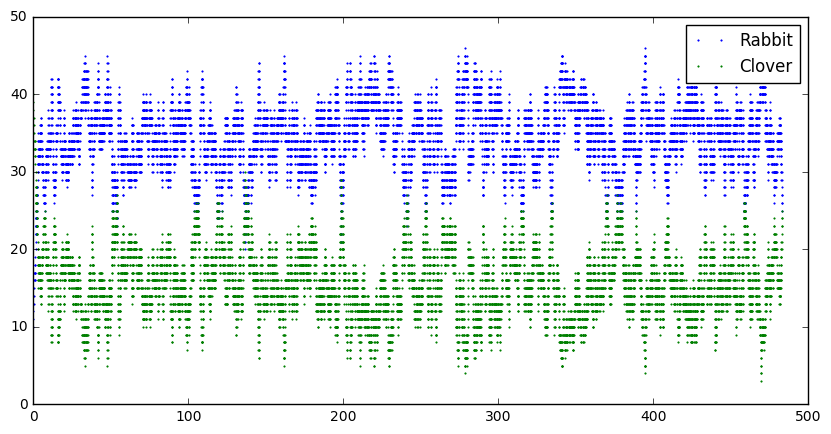

In [522]:
#%matplotlib nbagg
%matplotlib inline

import numpy as np
import matplotlib.pylab as plt

A = np.array([[1,1],[1,0]])
B = np.array([[2,0],[0,1]])
k = np.array([0.02,0.3])
x0 = np.array([10,40])

X,T = simulate_skm(A,B,k,x0,STEPS=10000)

plt.figure(figsize=(10,5))
plt.plot(T,X[0,:], '.b',ms=2)
plt.plot(T,X[1,:], '.g',ms=2)
plt.legend([u'Rabbit', u'Clover'])
plt.show()

## A simple ecological network

Food (Clover): 🍀

Prey (Rabbit): 🐰

Predator (Wolf): 🐺

<h1><center>
🐰🍀 $\rightarrow$ 🐰🐰 
</center></h1>
<h1><center>
🐰 $\rightarrow$ 🍀  
</center></h1>
<h1><center>
🐰🐺 $\rightarrow$ 🐺🐺 
</center></h1>
<h1><center>
🐺 $\rightarrow$  🍀 
</center></h1>


The number of objects in this system are constant 

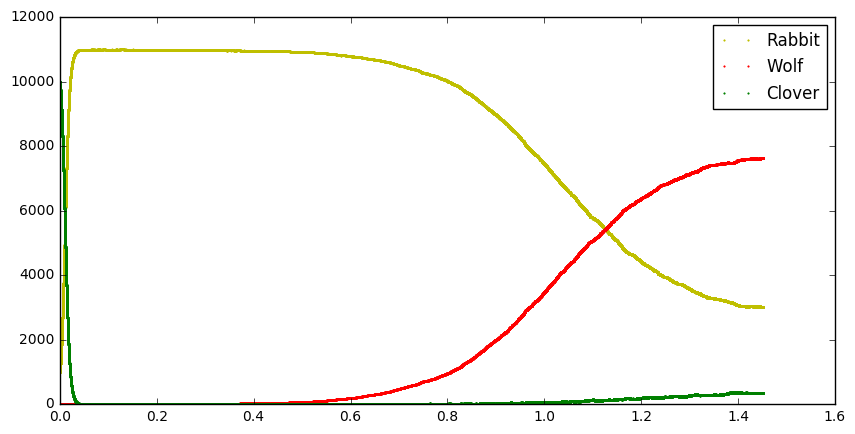

In [31]:
#%matplotlib nbagg
%matplotlib inline

import numpy as np
import matplotlib.pylab as plt

A = np.array([[1,0,1],[1,0,0],[1,1,0],[0,1,0]])
B = np.array([[2,0,0],[0,0,1],[0,2,0],[0,0,1]])

#k = np.array([0.02,0.09, 0.001, 0.3])
#x0 = np.array([1000,1000,10000])
k = np.array([0.02,0.19, 0.001, 2.8])
x0 = np.array([1000,1,10000])

X,T = simulate_skm(A,B,k,x0,STEPS=50000)

plt.figure(figsize=(10,5))
plt.plot(T,X[0,:], '.y',ms=2)
plt.plot(T,X[1,:], '.r',ms=2)
plt.plot(T,X[2,:], '.g',ms=2)
plt.legend([u'Rabbit',u'Wolf',u'Clover'])
plt.show()

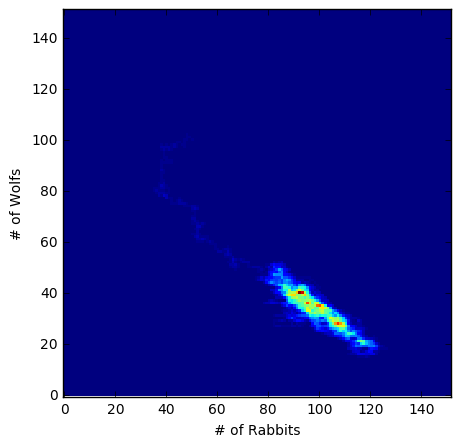

In [531]:
sm = int(sum(X[:,0]))+1
Hist = np.zeros((sm,sm))
STEPS = X.shape[1]

for i in range(STEPS):
    Hist[int(X[1,i]),int(X[0,i])] = Hist[int(X[1,i]),int(X[0,i])] + 1

plt.figure(figsize=(10,5))
#plt.plot(X[0,:],X[1,:], '.',ms=1)
plt.imshow(Hist,interpolation='nearest')
plt.xlabel('# of Rabbits')
plt.ylabel('# of Wolfs')
plt.gca().invert_yaxis()
#plt.axis('square')
plt.show()

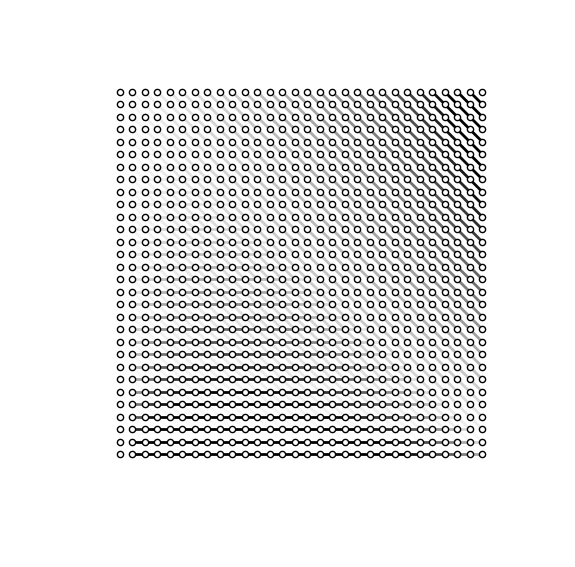

In [514]:
%matplotlib inline
import networkx as nx
import numpy as np
import matplotlib.pylab as plt

# Maximum number of rabbits or wolves
N = 30

k = np.array([0.005,0.06, 0.001, 0.1])

G = nx.DiGraph()
pos = [u for u in product(range(N),range(N))]
idx = [u[0]*N+u[1] for u in pos]

G.add_nodes_from(idx)
edge_colors = []
edges = []
for y,x in product(range(N),range(N)):
    clover = N - (x+y)
    source = (x,y)
    rho = k*np.array([source[0]*clover, source[0], source[0]*source[1], source[1]])
    srho = np.sum(rho)
    if srho==0:
        srho = 1.
        
    if x<N-1: # Rabbit Birth
        target = (x+1,y)
        edges.append((source[0]*N+source[1], target[0]*N+target[1]))
        edge_colors.append(rho[0]/srho)

    if y<N-1 and x>0: # Consumption
        target = (x-1,y+1)
        edges.append((source[0]*N+source[1], target[0]*N+target[1]))
        edge_colors.append(rho[2]/srho)
        
#    if y>0: # Wolf Death
#        target = (x,y-1)
#        edges.append((source[0]*N+source[1], target[0]*N+target[1]))
#        edge_colors.append(rho[3]/srho)

#    if x>0: # Rabbit Death
#        target = (x-1,y)
#        edges.append((source[0]*N+source[1], target[0]*N+target[1]))
#        edge_colors.append(rho[1]/srho)


G.add_edges_from(edges)
col_dict = {u: c for u,c in zip(edges, edge_colors)}
cols = [col_dict[u] for u in G.edges() ]

plt.figure(figsize=(5,5))
nx.draw(G, pos, arrows=False, width=2, node_size=20, node_color="white", edge_vmin=0,edge_vmax=0.4, edge_color=cols, edge_cmap=plt.cm.gray_r )

plt.xlabel('# of smileys')
plt.ylabel('# of zombies')
#plt.gca().set_visible('on')
plt.show()

## Alternative model

Constant food supply for the prey.

<h1><center>
🐰🍀 $\rightarrow$ 🐰🐰🍀
</center></h1>
<h1><center>
🐰🐺 $\rightarrow$ 🐺 
</center></h1>
<h1><center>
🐺 $\rightarrow$ 🐺🐺 
</center></h1>
<h1><center>
🐺 $\rightarrow$ ☠️
</center></h1>

This model is flawed as it allows predators to reproduce even when no prey is there.


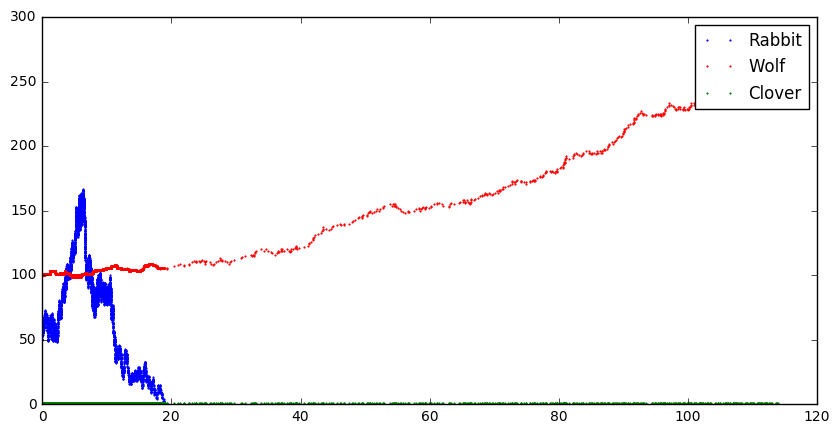

In [135]:
#%matplotlib nbagg
%matplotlib inline

import numpy as np
import matplotlib.pylab as plt

A = np.array([[1,0,1],[1,1,0],[0,1,0],[0,1,0]])
B = np.array([[2,0,1],[0,1,0],[0,2,0],[0,0,0]])
k = np.array([4.0,0.038, 0.02, 0.01])
x0 = np.array([50,100,1])

X,T = simulate_skm(A,B,k,x0,STEPS=10000)

plt.figure(figsize=(10,5))
plt.plot(T,X[0,:], '.b',ms=2)
plt.plot(T,X[1,:], '.r',ms=2)
plt.plot(T,X[2,:], '.g',ms=2)
plt.legend([u'Rabbit',u'Wolf',u'Clover'])
plt.show()



🙀 : Hungry cat

😻 : Happy cat 

<h1><center>
🐭🧀 $\rightarrow$ 🐭🐭🧀
</center></h1>
<h1><center>
🐭🙀 $\rightarrow$ 😻 
</center></h1>
<h1><center>
😻 $\rightarrow$ 🙀 
</center></h1>
<h1><center>
😻 $\rightarrow$ 🙀🙀
</center></h1>
<h1><center>
😻 $\rightarrow$ ☠️
</center></h1>
<h1><center>
🙀 $\rightarrow$ ☠️
</center></h1>




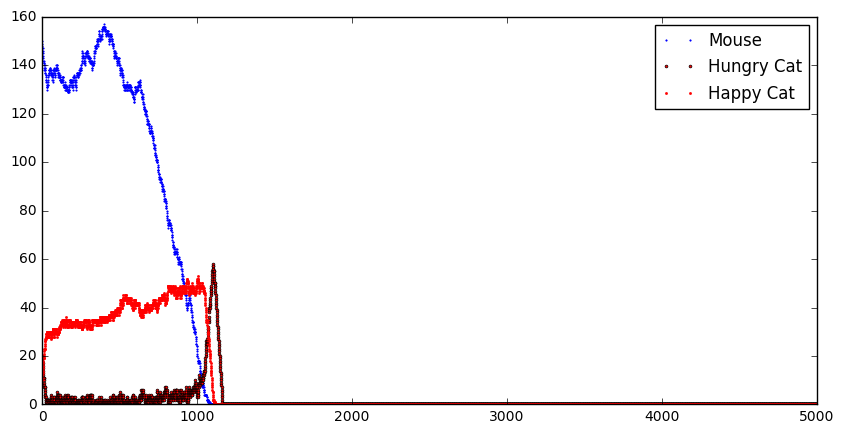

In [535]:
#%matplotlib nbagg
%matplotlib inline

import numpy as np
import matplotlib.pylab as plt

death_rate = 1.8
A = np.array([[1,0,0,1],[1,1,0,0],[0,0,1,0],[0,0,1,0],[0,0,1,0],[0,1,0,0]])
B = np.array([[2,0,0,1],[0,0,1,0],[0,1,0,0],[0,2,0,0],[0,0,0,0],[0,0,0,0]])
k = np.array([9.7,       9.5,       30,       3.5,       death_rate,      death_rate])
x0 = np.array([150,20,10,1])

X,T = simulate_skm(A,B,k,x0,STEPS=5000)

plt.figure(figsize=(10,5))
plt.plot(X[0,:], '.b',ms=2)
plt.plot(X[1,:], 'or',ms=2)
plt.plot(X[2,:], '.r',ms=3)
plt.legend([u'Mouse',u'Hungry Cat',u'Happy Cat'])
plt.show()

## From Diaconis and Freedman

A random walk on the unit interval. Start with $x$, choose one of the two intervals $[0,x]$ and $[x,1]$ with equal probability $0.5$, then choose a new $x$ uniformly on the interval. 

In [32]:
%matplotlib inline
import numpy as np




## A random switching system

\begin{eqnarray}
A(0) & = & \left(\begin{array}{cc} 0.444 & -0.3733 \\ 0.06 & 0.6000 \end{array}\right) \\
B(0) & = & \left(\begin{array}{c} 0.3533 \\ 0 \end{array}\right) \\
A(1) & = & \left(\begin{array}{cc} -0.8 & -0.1867 \\ 0.1371 & 0.8 \end{array}\right) \\
B(1) & = & \left(\begin{array}{c} 1.1 \\ 0.1 \end{array}\right) \\
w & = & 0.2993
\end{eqnarray}


\begin{eqnarray}
c_t & \sim & \mathcal{BE}(c; w) \\
x_t & = & A(c_t) x_{t-1} + B(c_t)
\end{eqnarray}


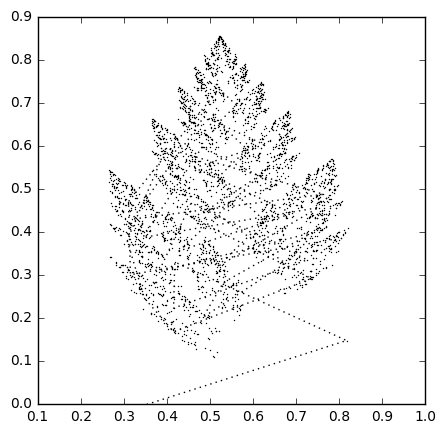

In [24]:
#Diaconis and Freedman fern

%matplotlib inline
import numpy as np
import matplotlib.pylab as plt


T = 3000;
x = np.matrix(np.zeros((2,T)));
x[:,0] = np.matrix('[0.3533; 0]');
A = [np.matrix('[0.444 -0.3733;0.06 0.6000]'), np.matrix('[-0.8 -0.1867;0.1371 0.8]')];
B = [np.matrix('[0.3533;0]'), np.matrix('[1.1;0.1]')];
w = 0.27;
for i in range(T-1):
    if np.random.rand()<w:
        c = 0;
    else:
        c = 1;
    x[:,i+1] = A[c]*x[:,i] + B[c] 


plt.figure(figsize=(5,5))
plt.plot(x[0,:],x[1,:], 'k.',ms=1)
plt.plot(x[0,0:40].T,x[1,0:40].T, 'k:')
plt.axis('equal')
plt.show()


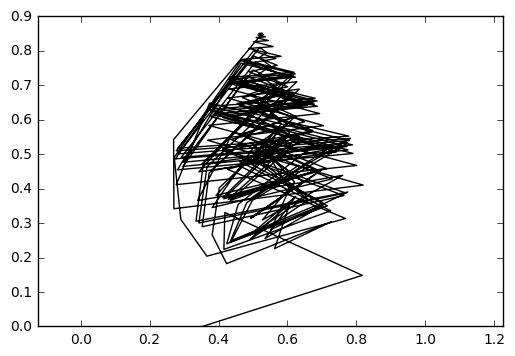

In [36]:
plt.plot(x[0,0:200].T,x[1,0:200].T, 'k-')
plt.axis('equal')
plt.show()

## Polya Urn Models
Many urn models can be represented as instances of the stochastic kinetic model

Mahmoud:

Ballot Problem

\begin{eqnarray}
2X_1 & \rightarrow & X_1 \\
2X_2 & \rightarrow & X_2
\end{eqnarray}

Polya-Eggenberger Urn

\begin{eqnarray}
X_1 & \rightarrow & s X_1 \\
X_2 & \rightarrow & s X_2
\end{eqnarray}

Bernard-Friedman Urn
\begin{eqnarray}
X_1 & \rightarrow & s X_1 + a X_2 \\
X_2 & \rightarrow & a X_1 + s X_2
\end{eqnarray}

Bagchi-Pal Urn
\begin{eqnarray}
X_1 & \rightarrow & a X_1 + b X_2 \\
X_2 & \rightarrow & c X_1 + d X_2
\end{eqnarray}

Ehrenfest
\begin{eqnarray}
X_1 & \rightarrow & X_2 \\
X_2 & \rightarrow & X_1 \\
\end{eqnarray}


Extended Ehrenfest?
\begin{eqnarray}
2 X_1 & \rightarrow & X_1 + X_2 \\
2 X_2 & \rightarrow & X_1 + X_2 \\
\end{eqnarray}




Ehrenfest

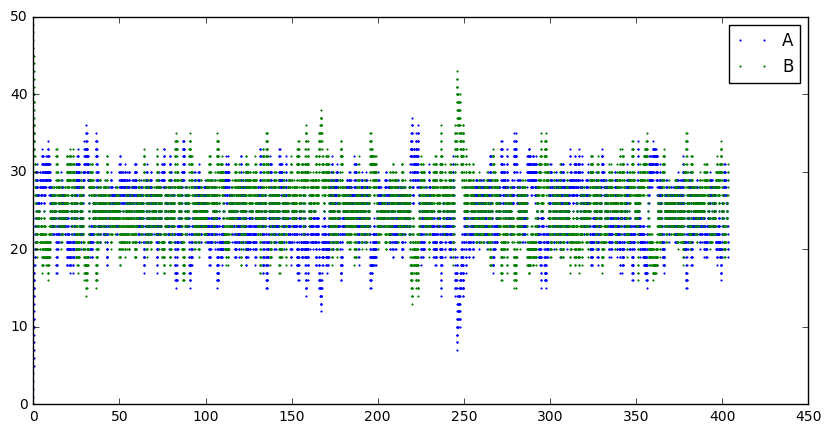

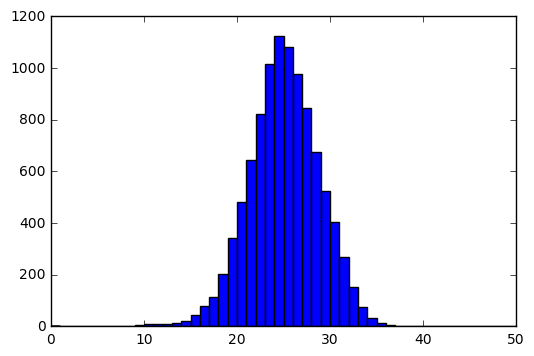

In [16]:
#%matplotlib nbagg
%matplotlib inline

import numpy as np
import matplotlib.pylab as plt

A = np.array([[1,0],[0,1]])
B = np.array([[0,1],[1,0]])
k = np.array([0.5,0.5])
x0 = np.array([0,50])

X,T = simulate_skm(A,B,k,x0,STEPS=10000)

plt.figure(figsize=(10,5))
plt.plot(T,X[0,:], '.b',ms=2)
plt.plot(T,X[1,:], '.g',ms=2)
plt.legend([u'A', u'B'])
plt.show()

plt.hist(X[0,:],range=(0,np.sum(x0)),bins=np.sum(x0))
plt.show()

Polya

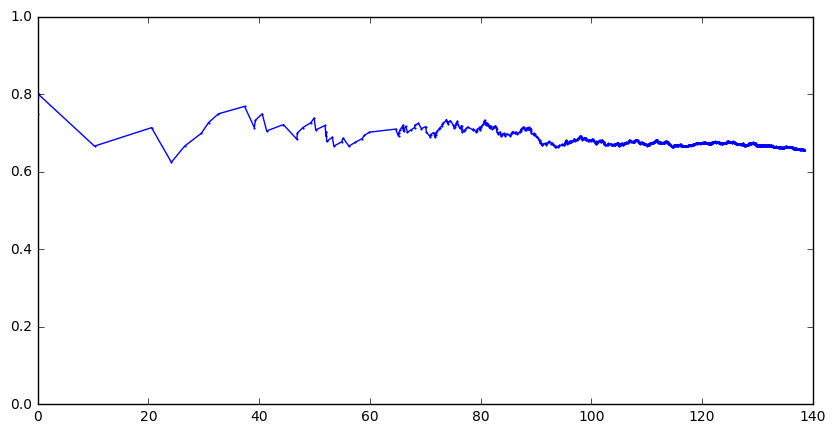

In [40]:
%matplotlib inline

import numpy as np
import matplotlib.pylab as plt

A = np.array([[1,0],[0,1]])
B = np.array([[2,0],[0,2]])
k = np.array([0.05,0.05])
x0 = np.array([3,1])

X,T = simulate_skm(A,B,k,x0,STEPS=2000)

plt.figure(figsize=(10,5))
plt.plot(T,X[0,:]/(X[0,:]+X[1,:]), '.-',ms=2)
plt.ylim([0,1])
plt.show()

